<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# CCXT - Predict Bitcoin from Binance
[![download](https://img.shields.io/static/v1?label=&labelColor=000000&message=Open%20in%20Naas&color=success&logo=image%2Fsvg%2Bxml%3Bbase64%2CPD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0iVVRGLTgiPz4KPHN2ZyB3aWR0aD0iMTAyNHB4IiBoZWlnaHQ9IjEwMjRweCIgdmlld0JveD0iMCAwIDEwMjQgMTAyNCIgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIiB4bWxuczp4bGluaz0iaHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayIgdmVyc2lvbj0iMS4xIj4KIDwhLS0gR2VuZXJhdGVkIGJ5IFBpeGVsbWF0b3IgUHJvIDIuMC41IC0tPgogPGRlZnM%2BCiAgPHRleHQgaWQ9InN0cmluZyIgdHJhbnNmb3JtPSJtYXRyaXgoMS4wIDAuMCAwLjAgMS4wIDIyOC4wIDU0LjUpIiBmb250LWZhbWlseT0iQ29tZm9ydGFhLVJlZ3VsYXIsIENvbWZvcnRhYSIgZm9udC1zaXplPSI4MDAiIHRleHQtZGVjb3JhdGlvbj0ibm9uZSIgZmlsbD0iI2ZmZmZmZiIgeD0iMS4xOTk5OTk5OTk5OTk5ODg2IiB5PSI3MDUuMCI%2BbjwvdGV4dD4KIDwvZGVmcz4KIDx1c2UgaWQ9Im4iIHhsaW5rOmhyZWY9IiNzdHJpbmciLz4KPC9zdmc%2BCg%3D%3D)](https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/CCXT/CCXT_Predict_Bitcoin_from_Binance.ipynb)

Prerequisite : get binance API Key

In [ ]:
pip install ccxt --user

In [35]:
import naas
import ccxt
import pandas as pd
from datetime import datetime
import naas_drivers

In [77]:
binance = ccxt.binance({
    'apiKey': naas.secret.get('binance_api'),
    'secret': naas.secret.get('binance_secret')
}) 
# binance['api'] = binance['test']

data = binance.fetch_ohlcv(symbol = 'BTC/USDT', limit = 200, timeframe = '1d')

In [78]:
df = pd.DataFrame(data, columns=["Date","Open","High","Low","Close","Volume"])
df['Date'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Date']]
df

,Date,Open,High,Low,Close,Volume
0,2020-07-13 02:00:00,9303.31,9343.82,9200.89,9242.62,42740.069115
1,2020-07-14 02:00:00,9242.61,9279.54,9113.00,9255.85,45772.552509
2,2020-07-15 02:00:00,9255.85,9276.49,9160.57,9197.60,39053.579665
3,2020-07-16 02:00:00,9197.60,9226.15,9047.25,9133.72,43375.571191
4,2020-07-17 02:00:00,9133.72,9186.83,9089.81,9154.32,28054.358741
...,...,...,...,...,...,...
195,2021-01-24 01:00:00,32078.00,33071.00,30900.00,32259.90,57978.037966
196,2021-01-25 01:00:00,32259.45,34875.00,31910.00,32254.20,88499.226921
197,2021-01-26 01:00:00,32254.19,32921.88,30837.37,32467.77,84972.206910
198,2021-01-27 01:00:00,32464.01,32557.29,29241.72,30366.15,95911.961711


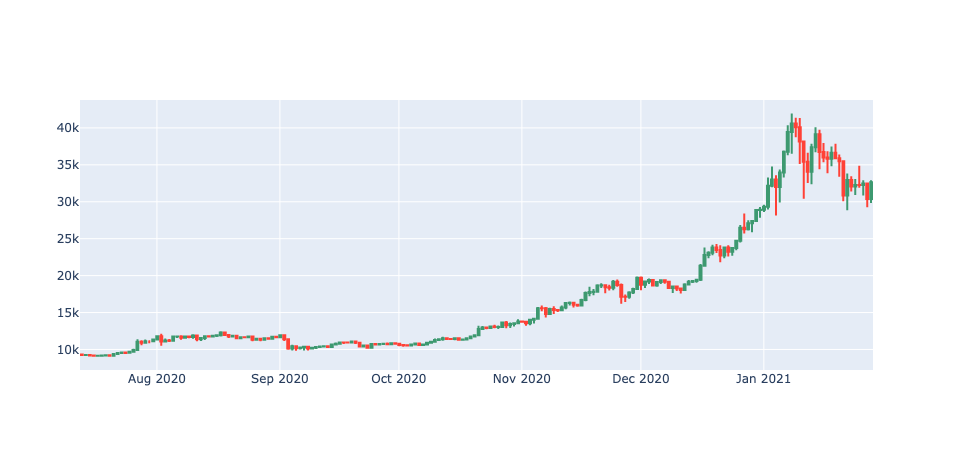

In [73]:
chart = naas_drivers.plotly.candlestick(df,
    label_x="Date", 
    label_open="Open", 
    label_high="High",
    label_low="Low",
    label_close="Close"
)
chart

In [74]:
df[f"MA{20}"] = df.Close.rolling(
                    20
                ).mean()
df[f"MA{50}"] = df.Close.rolling(
                    50
                ).mean()

In [75]:
pr = naas_drivers.prediction.get(dataset=df)
chart = naas_drivers.plotly.stock(pr, kind="linechart"
)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3250.160, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3247.387, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3248.308, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3248.213, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3249.273, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.287 seconds
Chart linechart generated


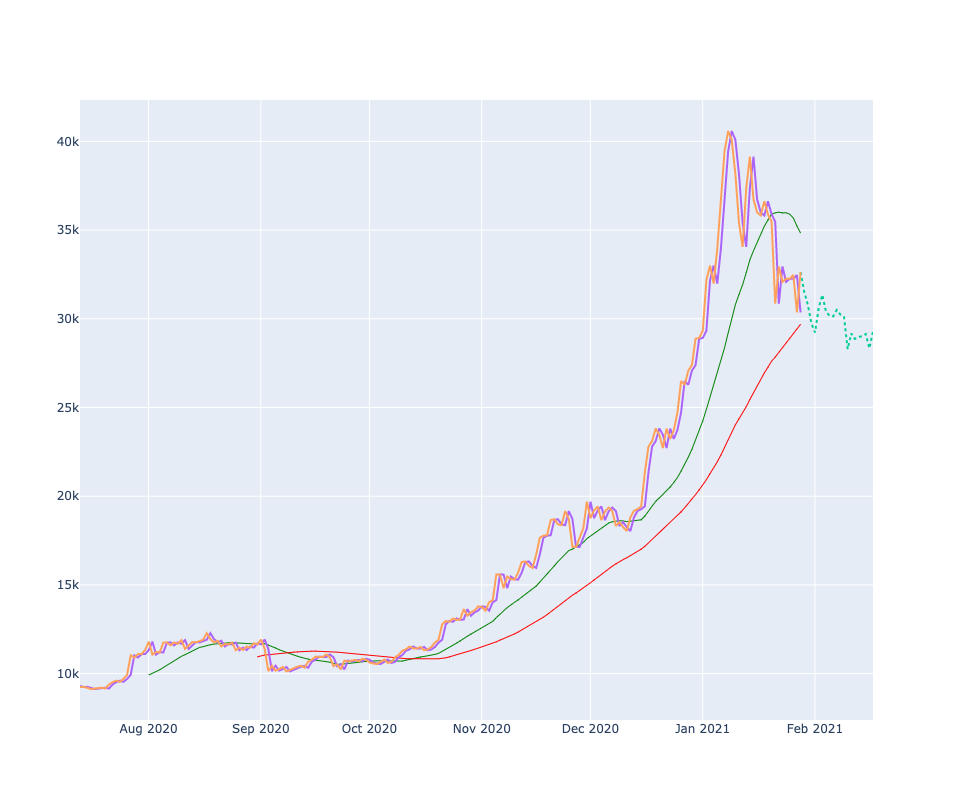

In [76]:
chart.update_layout(
    autosize=True,
    width=1300,
    height=800,
)
chart